# Capstone: Text Factorizing with NLP
## Thomas Ludlow

# 03 - EDA for Corpus Texts

This notebook contains procedures for EDA on source texts used to build the LDA corpus.  It must parse the text input and group into paragraphs, which will be the observation unit.  This will allow the final RNN to return meaningful results with input ranging from short sentences to long paragraphs.

**Libraries**

In [1]:
# Python Data Science
import re
import numpy as np
import pandas as pd

# Natural Language Processing
import spacy

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Override deprecation warnings
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

**Source Text Info**

In [3]:
text_data = pd.read_csv('./data/text_data.csv')
text_data

,Title,Author,Filename,Start Key,End Key,Category,Bumper Sticker,Original Language,Country,Year,Year Val,Wiki Link,Wiki Text,Paragraphs
0,Book of the Dead: The Papyrus of Ani,Ani,ani_papyrus.txt,THE PAPYRUS OF ANI,***END***,Polytheism,Magic spells will assist the dead in journey t...,Heiroglyphic,Egypt,2400-1250 BC,-1250,https://en.wikipedia.org/wiki/Book_of_the_Dead,The Book of the Dead is an ancient Egyptian fu...,343
1,The Categories,Aristotle,aristotle_categories.txt,*** START OF THIS PROJECT GUTENBERG EBOOK THE ...,End of the Project Gutenberg EBook of The Cate...,Hylomorphism,Being is a compound of matter and form,Greek,Greece,~335 BC,-335,https://en.wikipedia.org/wiki/Categories_(Aris...,The Categories (Greek Κατηγορίαι Katēgoriai; L...,132
2,The Poetics,Aristotle,aristotle_poetics.txt,ARISTOTLE ON THE ART OF POETRY,End of the Project Gutenberg EBook of The Poet...,Dramatic and Literary Theory,"Dramatic works imitate but vary in music, char...",Greek,Greece,335 BC,-335,https://en.wikipedia.org/wiki/Poetics_(Aristotle),Aristotle's Poetics (Greek: Περὶ ποιητικῆς; La...,72
3,The Gospel,"Buddha, Siddhartha Guatama",buddha_gospel.txt,500 BC,***END***,Buddhism,Human suffering and the cycle of death and reb...,English,India,~500 BC,-500,https://en.wikipedia.org/wiki/The_Gospel_of_Bu...,The Gospel of Buddha was an 1894 book by Paul ...,576
4,The Word,"Buddha, Siddhartha Guatama",buddha_word.txt,"BUDDHA, THE WORD",THE END,Buddhism,Four noble truths are understood by the enligh...,English,India,~500 BC,-500,https://en.wikipedia.org/wiki/Noble_Eightfold_...,The Noble Eightfold Path (Pali: ariyo aṭṭhaṅgi...,193
5,Analects,Confucius,confucius_analects.txt,THE CHINESE CLASSICS,End of Project Gutenberg Etext THE CHINESE CLA...,Confucianism,Moral welfare and human virtue spring from alt...,Chinese,China,~475-206 BC,-206,https://en.wikipedia.org/wiki/Analects,The Analects (Chinese: 論語; pinyin: Lúnyǔ; Old ...,509
6,The Doctrine of the Mean,Confucius,confucius_mean.txt,THE DOCTRINE OF THE MEAN,THE END,Confucianism,"The superior man uses self-watchfulness, lenie...",Chinese,China,~500 BC,-500,https://en.wikipedia.org/wiki/Doctrine_of_the_...,The Doctrine of the Mean or Zhongyong is both ...,70
7,Meditations on First Philosophy,"Descartes, Rene",descartes_meditations.txt,TO THE MOST WISE AND ILLUSTRIOUS THE,"1Copyright: 1996, James Fieser (jfieser@utm.ed...",Skepticism,Man is a thinking being capable of understandi...,Latin,France,1641,1641,https://en.wikipedia.org/wiki/Meditations_on_F...,Meditations on First Philosophy in which the e...,144
8,The Principles of Philosophy,"Descartes, Rene",descartes_principles.txt,SELECTIONS FROM THE PRINCIPLES OF PHILOSOPHY,End of Project Gutenberg's The Principles of P...,Rationalism,"Philosophy is the study of wisdom, and knowled...",Latin,Dutch Republic,1644,1644,https://en.wikipedia.org/wiki/Principles_of_Ph...,Principles of Philosophy (Latin: Principia Phi...,185
9,Moral Principles in Education,"Dewey, John",dewey_education.txt,MORAL PRINCIPLES IN EDUCATION,End of Project Gutenberg's Moral Principles in...,Instrumentalism,A successful scientific theory reveals known e...,English,United States,1909,1909,https://en.wikipedia.org/wiki/John_Dewey,"John Dewey (/ˈduːi/; October 20, 1859 – June 1...",65


In [32]:
text_data.shape

(45, 14)

In [4]:
text_data = text_data.sort_values(['Author','Title'])
text_data.index = range(text_data.shape[0])

In [25]:
text_data.loc[6, 'Bumper Sticker']

'The superior man uses self-watchfulness, leniency and sincerity to direct the mind to a state of equilibrium'

In [33]:
text_data.to_csv('./data/text_data.csv', index=False)

**Data Directory Prefix**

In [5]:
prefix = './data/'

**Remove page breaks from texts (Hayek)**

In [6]:
def rem_num_pb(filename, new_filename):
    # Open target file and create list of each line in file
    file = open(str(prefix + filename), 'r')
    file_lines = file.readlines()
    
    # Empty list to hold output lines
    lines_to_write = []
    
    # Instantiate independent counter
    i = 0
    
    # Begin loop of at most n-11 iterations
    for _ in range(len(file_lines[:-11])):
        
        # If the page number and page break format is found, move independent counter up 11
        # NOTE: this format is specific to the Reader's Digest text of 'The Road to Serfdom':
        # '\n'
        # '\n'
        # '\n'
        # <page number>
        # '\n'
        # '\n'
        # '\n'
        # <chapter title>
        # '\n'
        # '\n'
        # '\n'
        
        if file_lines[i:i+3] == (['\n']*3) and file_lines[i+4:i+7] == (['\n']*3) and file_lines[i+8:i+11] == (['\n']*3):
            i += 11
        
        # Otherwise add the current line to the output list and increase counter by 1
        else:
            lines_to_write.append(file_lines[i])
            i += 1
        
        # If the counter is too high to index, exit the loop
        if i >= len(file_lines[:-11]): 
            break
    
    # Create new writable file with new_filename argument
    new_file = open(str(prefix + new_filename), 'w+')
    
    # Write each line to the new file
    for new_line in lines_to_write:
        new_file.write(new_line)
        
    # Close new file an print completion status, new file directory location
    new_file.close()
    print('Page numbers and page breaks removed.')
    print('Updated file saved as:',str(prefix + new_filename))

(This update is complete.)

In [535]:
# rem_num_pb('hayek_serfdom.txt','hayek_serfdom_eda.txt')

Page numbers and page breaks removed.
Updated file saved as: ./data/hayek_serfdom_eda.txt


**Update Filename in DataFrame**

In [7]:
text_data[text_data['Author']=='Hayek, Friedrich']

,Title,Author,Filename,Start Key,End Key,Category,Bumper Sticker,Original Language,Country,Year,Year Val,Wiki Link,Wiki Text
11,The Road to Serfdom,"Hayek, Friedrich",hayek_serfdom.txt,"(condensed version, published in the Reader's ...",The Institute is a research and educational ch...,Classical Liberalism,Government control of economic decision-making...,English,United Kingdom,1944,1944,https://en.wikipedia.org/wiki/The_Road_to_Serfdom,The Road to Serfdom (German: Der Weg zur Knech...


In [8]:
text_data.loc[11, 'Filename'] = 'hayek_serfdom_eda.txt'

In [9]:
text_data[text_data['Author']=='Hayek, Friedrich']

,Title,Author,Filename,Start Key,End Key,Category,Bumper Sticker,Original Language,Country,Year,Year Val,Wiki Link,Wiki Text
11,The Road to Serfdom,"Hayek, Friedrich",hayek_serfdom_eda.txt,"(condensed version, published in the Reader's ...",The Institute is a research and educational ch...,Classical Liberalism,Government control of economic decision-making...,English,United Kingdom,1944,1944,https://en.wikipedia.org/wiki/The_Road_to_Serfdom,The Road to Serfdom (German: Der Weg zur Knech...


In [10]:
text_data.to_csv('./data/text_data.csv', index=False)

**Open listed filenames**

In [11]:
files = []

for name in text_data.Filename.iteritems():
    new_file = open(str(prefix + name[1]),'r')
    files.append(new_file)

In [12]:
lines = []

for f in files:
    new_line = f.readlines()
    lines.append(new_line)

## Trim Metadata Text

Using "Start Key" and "End Key" text values to determine where a work begins (following any preface or introduction by another author) and where it ends (preceding any Gutenberg or other public domain licensing information).  This was done by manually reviewing text source files to identify unique strings indicating beginning and end.

In [13]:
def trim_text(text_list, start_key, end_key):
    start_index = 0
    end_index = len(text_list)
    for i, line in enumerate(text_list):
        if line[:-1].strip() == start_key.strip():
            start_index = i
        if line[:-1].strip() == end_key.strip():
            end_index = i
    return(text_list[start_index:end_index+1])

In [14]:
sk = text_data['Start Key']
ek = text_data['End Key']

In [15]:
text_data_tr = []

for i, book in enumerate(lines):
    text_data_tr.append(trim_text(book, sk[i], ek[i]))
    

In [16]:
for tr in text_data_tr[8:11]:
    print(tr[:10], tr[-10:], '\n')

['SELECTIONS FROM THE PRINCIPLES OF PHILOSOPHY\n', '\n', 'OF DESCARTES\n', '\n', 'TRANSLATED FROM THE LATIN AND COLLATED WITH THE FRENCH\n', '\n', '\n', '\n', 'LETTER OF THE AUTHOR\n', '\n'] ['submit all these my opinions to the authority of the church and the\n', 'judgment of the more sage; and I desire no one to believe anything I\n', 'may have said, unless he is constrained to admit it by the force and\n', 'evidence of reason.\n', '\n', '\n', '\n', '\n', '\n', "End of Project Gutenberg's The Principles of Philosophy, by Rene Descartes\n"] 

['MORAL PRINCIPLES IN EDUCATION\n', '\n', 'BY\n', '\n', 'JOHN DEWEY\n', '\n', '\n', 'PROFESSOR OF PHILOSOPHY IN COLUMBIA UNIVERSITY\n', '\n', '\n'] [" WILSON's What Arithmetic Shall We Teach?\n", '\n', '\n', 'HOUGHTON MIFFLIN COMPANY\n', '\n', '\n', '\n', '\n', '\n', "End of Project Gutenberg's Moral Principles in Education, by John Dewey\n"] 

['THE BOOKS OF KAHLIL GIBRAN\n', '\n', 'The Madman. 1918 Twenty Drawings. 1919\n', 'The Forerunner. 192

## Paragraph Parser

In [17]:
def par_list(text_list, min_lines=3):
    pars = []
    count = 0
    
    # Check the longest single line to determine threshold for end of paragraph lines
    line_lengths = [len(text_list[t].strip()) for t in range(len(text_list))]
    line_check_length = max(line_lengths)
    
    for i, line in enumerate(text_list):
        # If it reaches a blank line after too few lines, reset count
        if line == '\n' and count < min_lines: 
            count = 0
        
        # If it reaches the end of a paragraph after too few lines, reset count
        elif len(line.strip()) < (line_check_length * .67) and count < min_lines:
            count = 0
            
        # If it reaches a blank line after enough lines, save paragraph and reset count
        elif line == '\n' and count >= min_lines:
            loop_par = ''
            for j in range(count+1):
                loop_par += text_list[(i-count)+j].replace('\n','').strip() + ' '
            pars.append(loop_par[:-1])
            count = 0
        
        # If it sees the end of a paragraph after enough lines, save paragraph and reset count
        elif len(line.strip()) < (line_check_length * .67) and count >= min_lines:
            loop_par = ''
            for j in range(count+1):
                loop_par += text_list[(i-count)+j].replace('\n','').strip() + ' '
            pars.append(loop_par[:-1])
            count = 0
            
        # Otherwise increase count
        else:
            count += 1
        
    return pars

In [18]:
par_list(text_data_tr[10], 3)[:5]

['The Madman. 1918 Twenty Drawings. 1919 The Forerunner. 1920 The Prophet. 1923 Sand and Foam. 1926 Jesus the Son of Man. 1928 The Forth Gods. 1931 The Wanderer. 1932 The Garden of the Prophet 1933 Prose Poems. 1934 Nymphs of the Valley. 1948',
 'The Coming of the Ship.......7 On Love.....................15 On Marriage.................19 On Children.................21 On Giving...................23 On Eating and Drinking......27 On Work.....................31 On Joy and Sorrow...........33 On Houses...................37 On Clothes..................41 On Buying and Selling.......43 On Crime and Punishment.....45 On Laws.....................51 On Freedom..................55 On Reason and Passion.......57 On Pain.....................60 On Self-Knowledge...........62 On Teaching.................64 On Friendship...............66 On Talking..................68 On Time.....................70 On Good and Evil............72 On Prayer...................76 On Pleasure.................79 On Beauty

**Paragraph Size Calibration**

In [19]:
# Loop through lengths of paragraph sizes for each book
min_size = 2
max_size = 5

c_list = []

for i, book in enumerate(text_data_tr):
    b_list = []
    print(i, text_data.loc[i,'Title'])
    for n in range(min_size, max_size+1):
        b_list.append(len(par_list(book, n)))
    c_list.append(b_list)

0 Book of the Dead: The Papyrus of Ani
1 The Categories
2 The Poetics
3 The Gospel
4 The Word
5 Analects
6 The Doctrine of the Mean
7 Meditations on First Philosophy
8 The Principles of Philosophy
9 Moral Principles in Education
10 The Prophet
11 The Road to Serfdom
12 Leviathan
13 An Enquiry Concerning the Principles of Morals
14 Essays in Radical Empiricism
15 The Critique of Pure Reason
16 The General Theory of Employment, Interest, and Money
17 The Rubaiyat
18 Tao Te Ching
19 A Letter Concerning Toleration
20 An Essay Concerning Human Understanding
21 The Prince
22 The Communist Manifesto
23 The Gospels
24 A System of Logic, Ratiocinative and Inductive
25 On Liberty
26 Utilitarianism
27 The Torah
28 The Quran
29 Thus Spake Zarathustra
30 Common Sense
31 The Rights of Man
32 The Republic
33 Theaetetus
34 For the New Intellectual: The Philosophy of Ayn Rand
35 The Social Contract
36 The Analysis of Mind
37 An Inquiry into the Nature and Causes of The Wealth of Nations
38 A Theologico

In [20]:
# Number of paragraphs within length range for each book
for i in range(len(c_list)):
    print(i, text_data.loc[i, 'Author'], text_data.loc[i, 'Title'], '\n', c_list[i], '\n')

0 Ani Book of the Dead: The Papyrus of Ani 
 [343, 285, 246, 200] 

1 Aristotle The Categories 
 [132, 124, 117, 101] 

2 Aristotle The Poetics 
 [72, 70, 67, 64] 

3 Buddha, Siddhartha Guatama The Gospel 
 [576, 532, 489, 436] 

4 Buddha, Siddhartha Guatama The Word 
 [193, 165, 135, 117] 

5 Confucius Analects 
 [509, 347, 233, 161] 

6 Confucius The Doctrine of the Mean 
 [70, 56, 51, 41] 

7 Descartes, Rene Meditations on First Philosophy 
 [144, 144, 141, 138] 

8 Descartes, Rene The Principles of Philosophy 
 [185, 147, 142, 139] 

9 Dewey, John Moral Principles in Education 
 [65, 63, 60, 57] 

10 Gibran, Khalil The Prophet 
 [461, 174, 65, 28] 

11 Hayek, Friedrich The Road to Serfdom 
 [215, 196, 168, 145] 

12 Hobbes, Thomas Leviathan 
 [1257, 1180, 1084, 1005] 

13 Hume, David An Enquiry Concerning the Principles of Morals 
 [355, 345, 331, 299] 

14 James, William Essays in Radical Empiricism 
 [397, 350, 318, 293] 

15 Kant, Immanuel The Critique of Pure Reason 
 [1143, 11

In [21]:
# Min par length, total paragraphs, min author pars, max author pars

for i in range(max_size - min_size):
    print(i+min_size, sum([c_list[j][i] for j in range(len(c_list))]),
          min([c_list[j][i] for j in range(len(c_list))]),
          max([c_list[j][i] for j in range(len(c_list))]))

2 28805 46 3274
3 19567 31 1678
4 15308 19 1294


**Create Paragraph List**

Min lines per paragraph: **2**

In [22]:
n_lines = 2
c_pars = [] # corpus paragraph list

for line in text_data_tr:
    c_pars.append(par_list(line, n_lines))

In [23]:
book_par_length = []

for i in range(len(c_pars)):
    book_par_length.append(len(c_pars[i]))

In [24]:
len(c_pars)

45

## Classes by Paragraph Count and Length

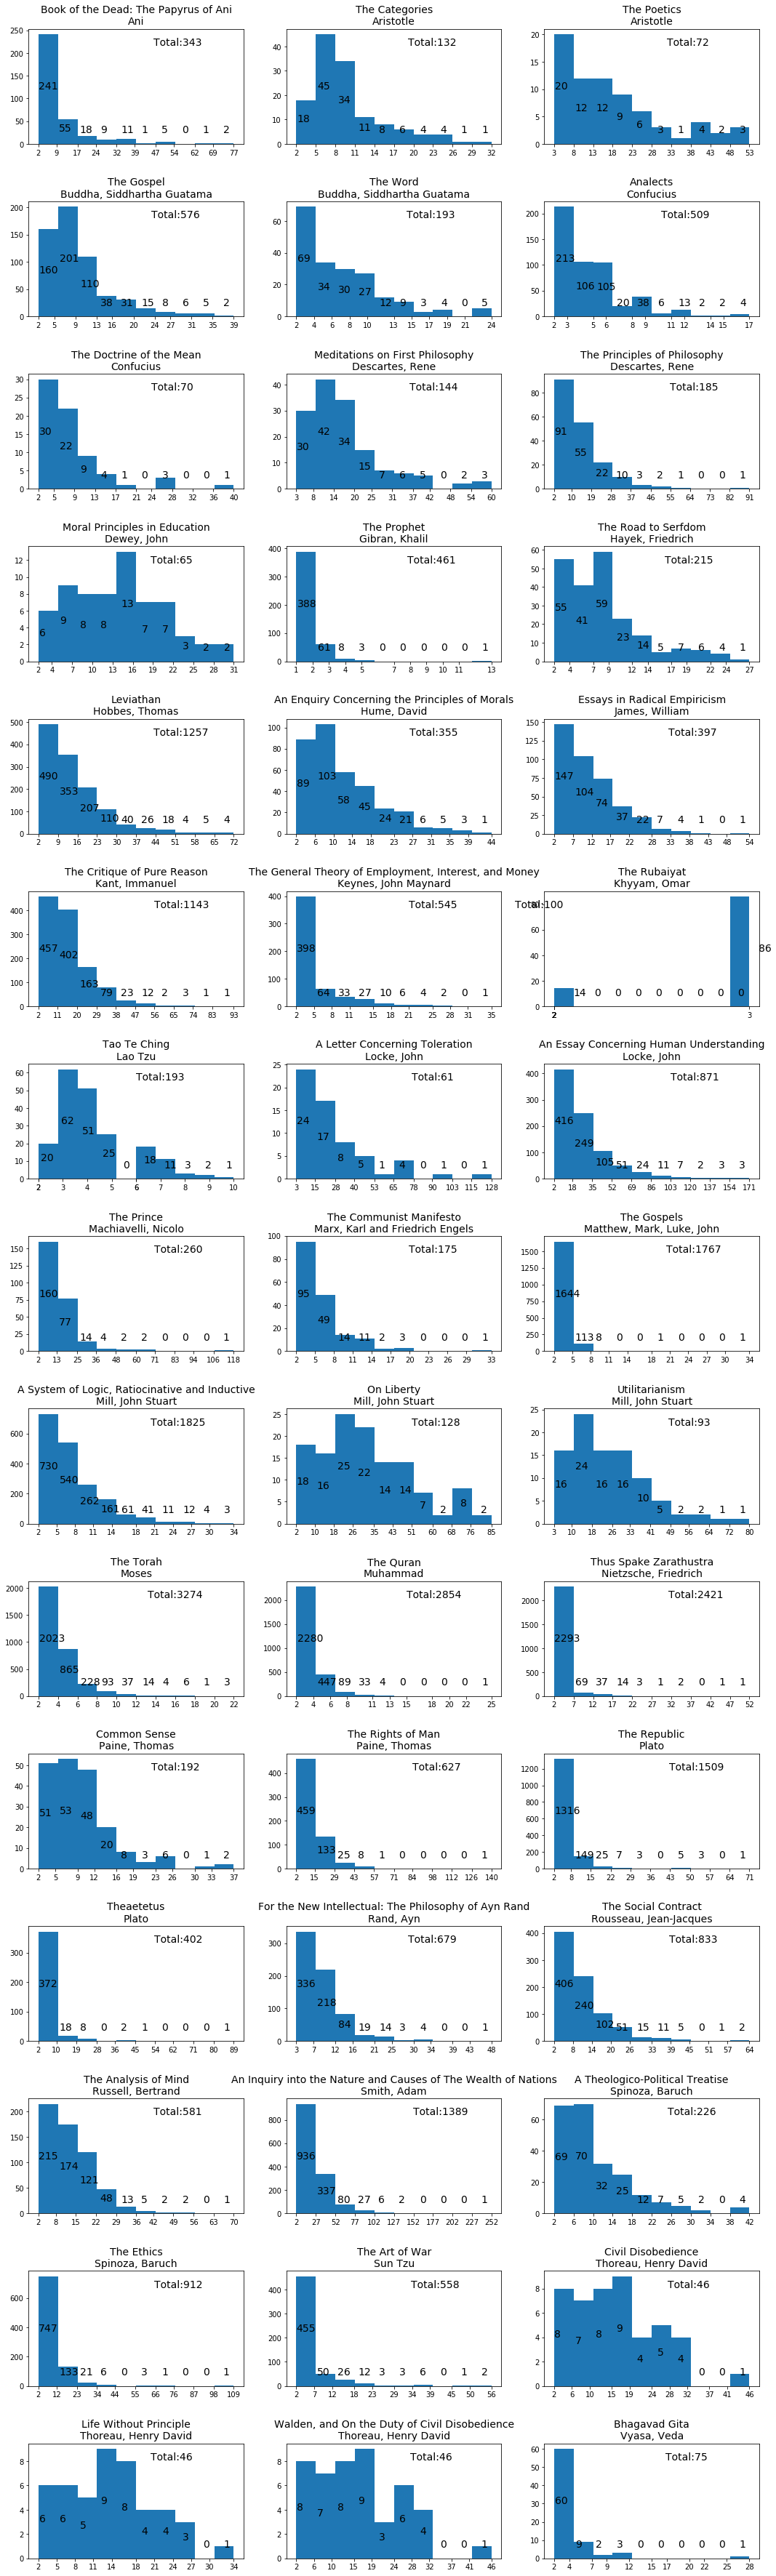

In [25]:
fig, ax = plt.subplots(15, 3, figsize=(18,64))
plt.subplots_adjust(hspace=0.5)
ax = ax.ravel()

for row in text_data.iterrows():
    ax[row[0]].set_title(row[1]['Title'] + '\n' + row[1]['Author'], fontsize=14, loc='center')
    new_hist = ax[row[0]].hist([int(len(par)/70)+1 for par in c_pars[row[0]]])
    ax[row[0]].set_xticks([int(new_hist[1][j]) for j in range(len(new_hist[1]))])
    ax[row[0]].text(x=(.6*new_hist[1][-1]), 
                    y=(.9*max(new_hist[0])), 
                    s='Total:{}'.format(len(c_pars[row[0]])), 
                    fontsize=14)
    for i in range(len(new_hist[0])):
        ax[row[0]].text(x=(new_hist[1][i]*1.05),
                        y=(max(max(new_hist[0])*.1,(new_hist[0][i]/2))), 
                        s=round(int(new_hist[0][i]),0), 
                        fontsize=14, 
                        color='k');

**Author Paragraph Count Ratios**

In [26]:
text_data['Paragraphs'] = [len(c_pars[i]) for i in range(len(c_pars))]

In [35]:
text_data.Paragraphs.sum()

28805

In [28]:
text_data.groupby(['Author']).Paragraphs.sum()

Author
Ani                                 343
Aristotle                           204
Buddha, Siddhartha Guatama          769
Confucius                           579
Descartes, Rene                     329
Dewey, John                          65
Gibran, Khalil                      461
Hayek, Friedrich                    215
Hobbes, Thomas                     1257
Hume, David                         355
James, William                      397
Kant, Immanuel                     1143
Keynes, John Maynard                545
Khyyam, Omar                        100
Lao Tzu                             193
Locke, John                         932
Machiavelli, Nicolo                 260
Marx, Karl and Friedrich Engels     175
Matthew, Mark, Luke, John          1767
Mill, John Stuart                  2046
Moses                              3274
Muhammad                           2854
Nietzsche, Friedrich               2421
Paine, Thomas                       819
Plato                            

Authors with multiple works that comprise > 1000 paragraphs:
 - Mill, John Stuart
 - Plato
 - Spinoza, Baruch

## Combine to DataFrame

In [29]:
book_df = pd.DataFrame(columns=['author','work','paragraph'])

for i, book in enumerate(c_pars):
    temp_df = pd.DataFrame(columns=['author','work','paragraph'])
    temp_df.paragraph = book
    temp_df.author = text_data.loc[i,'Author']
    temp_df.work = text_data.loc[i,'Title']
    book_df = book_df.append(temp_df)

In [30]:
book_df.shape

(28805, 3)

In [31]:
book_df.to_csv('./data/book_df.csv', index=False)